### Student Information
Name: Lai Shao Hong

Student ID: 41223229L

GitHub ID: shaohong722

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [5]:
### Begin Assignment Here

import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import PAMI
import umap

Dataset = pd.read_csv('./newdataset/Reddit-stock-sentiment.csv')

### **>>> Exercise 1:** Print out data

In [20]:
### Print out data

Dataset.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0


In [19]:
print("Dataset.columns: ")
list(Dataset.columns)

Dataset.columns: 


['type',
 'datetime',
 'post_id',
 'subreddit',
 'title',
 'author',
 'url',
 'upvotes',
 'downvotes',
 'upvote_ratio',
 'text',
 'subjectivity',
 'polarity',
 'sentiment',
 'entities',
 'label']

### **>>> Exercise 2:** Query

Goal : Search for the most upvote post

In [21]:
# Check for the type
Dataset['type'].unique()

array(['comment', 'post'], dtype=object)

In [25]:
## Quering the largest upvote
Dataset_post = Dataset[Dataset['type']=='post']
Dataset_post['upvotes'].max()

np.int64(1105)

In [70]:
## getting the index of the largest upvotes post

Index = Dataset_post[Dataset_post['upvotes'] == Dataset_post['upvotes'].max()].index

## The content of the post
print('\n'.join(Dataset_post.loc[Index,'text'].values[0].split('\n')))



> The 10-year Treasury yield climbed 6 basis points to 4.456% Friday Asia hours, as the sell-off in U.S. debt resumed.
> 
> Treasurys have seen a sharp sell-off this week, triggered by U.S. President Donald Trump’s tariff policies, forcing the administration to rethink its strategy and pause new tariffs on most countries.
> 
> The tariff reprieve helped drive a rally in stocks and halted the rise in yields, but the impact has since waned with both the slide in stocks and Treasurys resuming.

Can someone explain to me how we will avoid the same bond situation we were faced with on Wednesday morning? It feels like we're heading towards the same issue


### **>>> Exercise 3:** Category quering

In [75]:
## Identifying types of subreddit

Dataset['subreddit'].unique()

array(['wallstreetbets', 'StockMarket', 'stockstobuytoday', 'stocks'],
      dtype=object)

In [81]:
##querying stocks post

Dataset[(Dataset['subreddit']=='stocks') & (Dataset['type'] == 'post')]

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
63,post,2025-03-01 10:00:42,1j0w73o,stocks,Rate My Portfolio - r/Stocks Quarterly Thread ...,AutoModerator,https://www.reddit.com/r/stocks/comments/1j0w7...,79,4.0,0.95,Please use this thread to discuss your portfol...,0.368030,0.176667,1.0,"['Business', 'learn', 'Finviz', '/', 'broker',...",0.0
497,post,2025-04-11 2:58:02,1jwfydk,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Fidler_2K,https://www.reddit.com/r/stocks/comments/1jwfy...,1105,11.0,0.99,\r\n\r\n> The 10-year Treasury yield climbed 6...,0.602273,0.005682,1.0,"['Treasurys', 'Trump', 'someone', 'issue', 'ba...",0.0


### **>>> Exercise 4:** Find Na

In [83]:
import helpers.data_mining_helpers as dmh

Dataset.isnull().apply(lambda x: dmh.check_missing_values(x))

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0,0,0,0,0,783,783,0,0,0,0,0,0


In [84]:
Dataset.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 2)
1      (The amoung of missing records is: , 2)
2      (The amoung of missing records is: , 2)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 2)
                        ...                   
842    (The amoung of missing records is: , 2)
843    (The amoung of missing records is: , 2)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 2)
846    (The amoung of missing records is: , 2)
Length: 847, dtype: object

### **>>> Exercise 6:** Sampling

In [86]:
Dataset_sampling = Dataset.sample(n=300)

In [91]:
Dataset_sampling.head(3)

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
19,comment,2025-04-11 4:32:16,mmig2h2,stocks,U.S. 10-year Treasury yields rise as Trump tar...,Vanman04,https://www.reddit.com/r/stocks/comments/1jwfy...,12,NaN,NaN,I think we are past the numbers. Just assume f...,0.451956,0.029337,1.0,"['Hell', 'Far', 'stage', 'US', 'economy', 'par...",-1.0
62,comment,2025-04-11 16:11:48,mml28yw,StockMarket,The Trump administration is begging Xi Jinping...,FumblersUnited,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,Comedy gold :)),1.000000,0.500000,1.0,"['Comedy', 'gold']",-1.0
814,comment,2025-04-11 5:16:10,mmil81c,StockMarket,$ U.S. dollar value (crashing),Chelsea_Kias,https://i.redd.it/atvlo83gk4ue1.jpeg,10,NaN,NaN,He could just sleep through the presidency lik...,0.000000,0.300000,1.0,"['Biden', 'success', 'presidency']",-1.0


### **>>> Exercise 7:** Distribution

<Axes: title={'center': 'Subreddit Category distribution'}, xlabel='subreddit'>

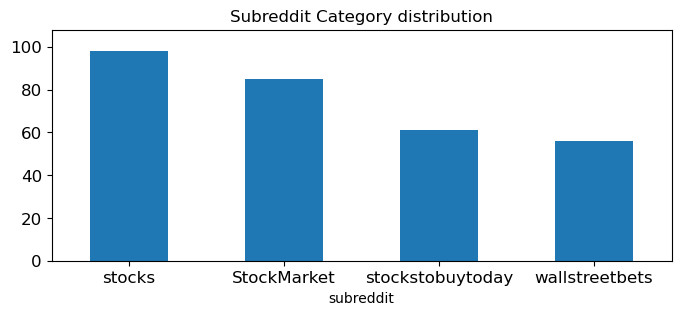

In [95]:
## Distribution of subreddit

Dataset_sampling.subreddit.value_counts().plot(kind = 'bar',
                                           title = 'Subreddit Category distribution',
                                           ylim = [0, Dataset_sampling.subreddit.value_counts().max()+10], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### **>>> Exercise 8:** Comparing Distribution

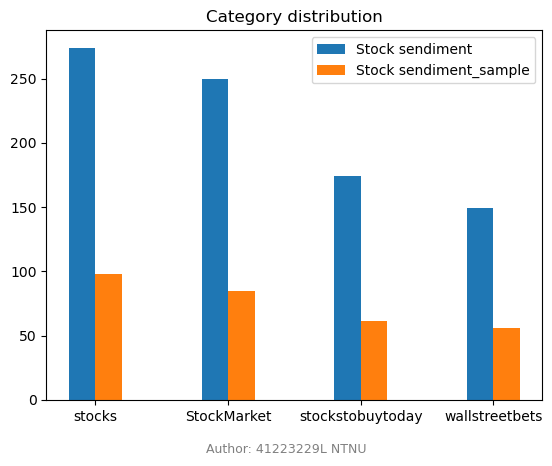

In [101]:
import matplotlib.pyplot as plt

w = 0.2
categories_ = np.arange(len(Dataset['subreddit'].unique()))

fig,ax = plt.subplots()
fig.suptitle("Author: 41223229L NTNU", y=0.02, fontsize=9, color="gray")


ax.bar(categories_ - w/2, Dataset.subreddit.value_counts(), width=w, label='Stock sendiment')
ax.bar(categories_ + w/2, Dataset_sampling.subreddit.value_counts(), width=w, label="Stock sendiment_sample")

ax.set_xticks(categories_)
ax.set_xticklabels(Dataset.subreddit.value_counts().index)
ax.set_title('Category distribution')
ax.legend()

plt.show()

### **>>> Exercise 9:** Feature subset selection

In [104]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Dataset_counts = count_vect.fit_transform(Dataset.text) 

In [106]:
analyze = count_vect.build_analyzer()
analyze(Dataset.text[0])

['calls', 'on', 'retards']

In [107]:
Dataset_counts.shape

(847, 4346)

In [108]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

### **>>> Exercise 10:** Token indexing

In [109]:
Dataset_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [111]:
## Choosing the fourth array
Fourth_records = Dataset_counts[3].toarray()

## Check for the non zero index position
np.nonzero(Fourth_records)

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0]),
 array([  18,  175,  195,  196,  197,  320,  327,  404,  406,  486,  560,
         576,  620,  856,  863,  865,  950, 1008, 1054, 1068, 1303, 1306,
        1329, 1388, 1523, 1542, 1604, 1699, 1788, 1837, 1842, 1892, 1894,
        1920, 2024, 2026, 2078, 2117, 2149, 2154, 2161, 2197, 2310, 2316,
        2339, 2397, 2405, 2422, 2560, 2622, 2685, 2687, 2706, 2714, 2796,
        2803, 2871, 2909, 2950, 3014, 3045, 3147, 3263, 3275, 3276, 3313,
        3376, 3436, 3437, 3517, 3585, 3775, 3823, 3824, 3846, 3848, 3849,
        3866, 3907, 3911, 3930, 4066, 4145, 4189, 4190, 4193, 4271, 4293,
        4323, 4335]))

In [ ]:
## Get the top 20 token in Fourth array

for i in range(20):
  Index = np.nonzero(Fourth_records)[1][i]
  print(count_vect.get_feature_names_out()[Index:Index+1])

['116']
['about']
['achieved']
['achievement']
['achieves']
['an']
['and']
['astonishing']
['at']
['be']
['blazing']
['boating']
['breaking']
['collaboration']
['combined']
['come']
['contribute']
['creating']
['cutting']
['danfoss']


### >>> **Exercise 12 :** Visualization

In [118]:
## Counting term_frequencies
term_frequencies = []
for j in range(0,Dataset_counts.shape[1]):
    term_frequencies.append(sum(Dataset_counts[:,j].toarray()))

term_frequencies = np.asarray(Dataset_counts.sum(axis=0))[0]

In [120]:
import plotly.express as px

fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300]) 
fig.update_layout(
  xaxis_title="Terms",
  yaxis_title="Frequencies",
  xaxis_range=[0,100],
  yaxis_range=[1,30],)

fig.show()

### >>> **Exercise 14 :** Long tail

In [121]:
top_idx = np.argsort(term_frequencies)[::-1][:100]

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies[top_idx]

fig = px.bar(x=top_terms, y=top_freqs)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Frequencies",
)

fig.show()

### >>> **Exercise 15 (take home):** Log Distribution

In [123]:
# Answer here

term_frequencies_log = np.log1p(term_frequencies)

# get top 100 terms
top_idx = np.argsort(term_frequencies_log)[::-1][:100]

top_terms = count_vect.get_feature_names_out()[top_idx]
top_freqs = term_frequencies_log[top_idx]

# plot
fig = px.bar(x=top_terms, y=top_freqs)
fig.update_layout(
    xaxis_title="Terms",
    yaxis_title="Log(Frequencies)"
)

fig.show()

# Phase 2

In [ ]:
### Begin Assignment Here